<a href="https://colab.research.google.com/github/MonaRansing/EDA_Superstore/blob/main/Exploratory_Data_Analysis_Retail1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **GRIP - The Sparks Foundation**

### **Author - Monika Ransing**

### **Task - 3 Exploratory Data Analysis - Retail**

### **Batch : GRIPJUNE23**

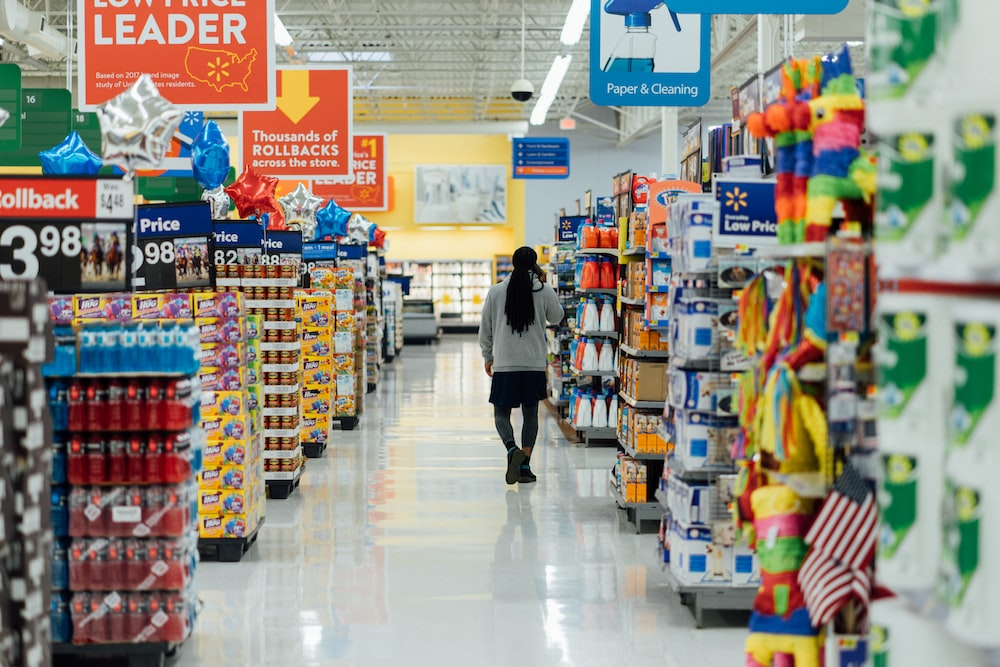

### ***Importing Libraries***

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams


### ***Loading Dataset***

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# CSV file is read here
df = pd.read_csv("/content/drive/MyDrive/Sparks foundation internship/SampleSuperstore.csv")

### ***Dataset First view***

In [5]:
# print first five rows
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
# print last five rows
df.tail(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### ***Dataset rows and columns count***

In [7]:
# Shape of dataset
df.shape

(9994, 13)

### ***Dataset Information***

In [8]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### ***Description of dataset***

In [9]:
# Description of dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# Creating copy of dataset
df1 = df.copy()
df1.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
no_of_states=df1['State'].nunique()
print("There are %d states in this dataset."%no_of_states)

There are 49 states in this dataset.


In [12]:
no_of_cities=df1['City'].nunique()
print("There are %d cities in this dataset."%no_of_cities)

There are 531 cities in this dataset.


In [13]:
no_of_subcategory=df1['Sub-Category'].nunique()
print("There are %d Sub-Category in this dataset."%no_of_subcategory)

There are 17 Sub-Category in this dataset.


### ***Find out Duplicate values***

In [14]:
# Dataset duplicate value count
duplicate_values = df1.duplicated().value_counts()
duplicate_values

False    9977
True       17
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

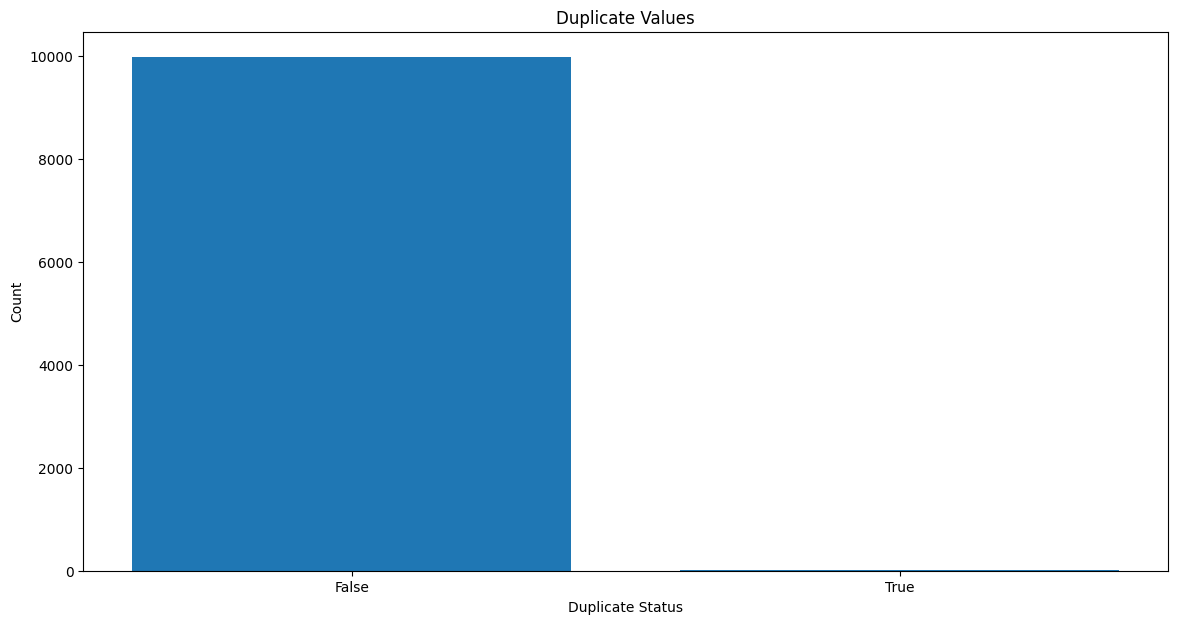

In [15]:
# visualization of duplicate values using countplot
plt.figure(figsize=(14,7))
plt.bar(duplicate_values.index.astype(str), duplicate_values.values)
plt.xlabel("Duplicate Status")
plt.ylabel("Count")
plt.title("Duplicate Values")
plt.show


In [16]:
# Droping duplicate values
df1 = df1.drop_duplicates()
df1

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [17]:
# shape after dropping duplicate values
df1.shape

(9977, 13)

### ***Missing Values***

In [18]:
# missing value count
missing_value = df1.isnull().sum().sort_values(ascending=False)

In [19]:
missing_value

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Information about dataset

* The dataset is of a superstore and I have to analyze and discover this dataset to find out weak areas where I can work to make more profit. So the dataset has 9994 rows and 13 columns initially. Then I found out that dataset has 17 duplicate values so after dropping them shape of dataset become 9977 rows and 13 columns. After that, I try to find out missing values but there is no missing values.
* The given dataset has one country, 49 number of states, 531 number of cities, 4 regions, 3 categories, 17 sub categories.

### ***Understanding variables***

In [20]:
# Columns from dataset
df1.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [21]:
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


### ***Variables Description***

* **Ship Mode** : Type of shipment
* **Segment** : Type of segment (Consumer, corporate, Home office)
* **Country** : Name of the country
* **City** : Name of the cities
* **State** : Name of the states
* **Postal code** : Postal code of the perticular city
* **Region** : Region of city (North, Sounth, East, West)
* **Category** : Category of the product
* **Sub-Category** : Sub category of the product
* **Sales** : Sales of the perticular product in perticular city
* **Quantity** : How many products were sold
* **Discount** : How much discount has given
* **Proft** : Profit on product


### ***Unique Values for each variable***

In [22]:
print(df1.apply(lambda col: col.unique()))

Ship Mode       [Second Class, Standard Class, First Class, Sa...
Segment                        [Consumer, Corporate, Home Office]
Country                                           [United States]
City            [Henderson, Los Angeles, Fort Lauderdale, Conc...
State           [Kentucky, California, Florida, North Carolina...
Postal Code     [42420, 90036, 33311, 90032, 28027, 98103, 761...
Region                               [South, West, Central, East]
Category                 [Furniture, Office Supplies, Technology]
Sub-Category    [Bookcases, Chairs, Labels, Tables, Storage, F...
Sales           [261.96, 731.94, 14.62, 957.5775, 22.368, 48.8...
Quantity          [2, 3, 5, 7, 4, 6, 9, 1, 8, 14, 11, 13, 10, 12]
Discount        [0.0, 0.45, 0.2, 0.8, 0.3, 0.5, 0.7, 0.6, 0.32...
Profit          [41.9136, 219.582, 6.8714, -383.031, 2.5164, 1...
dtype: object


### ***Data Wrangling***

In [23]:
# Dataset has 17 duplicate values. Those values are dropped here.
df1 = df.drop_duplicates()
df1

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### ***Data visualization***

### **Firstly I tried to fount out strong areas.**

### 1) Highly preferred ship mode?

In [24]:
ship_mode_counts = df1['Ship Mode'].value_counts().reset_index().rename(columns={'index':'Ship Mode','Ship Mode':'ship_mode_counts'})
ship_mode_counts

,Ship Mode,ship_mode_counts
0,Standard Class,5955
1,Second Class,1943
2,First Class,1537
3,Same Day,542


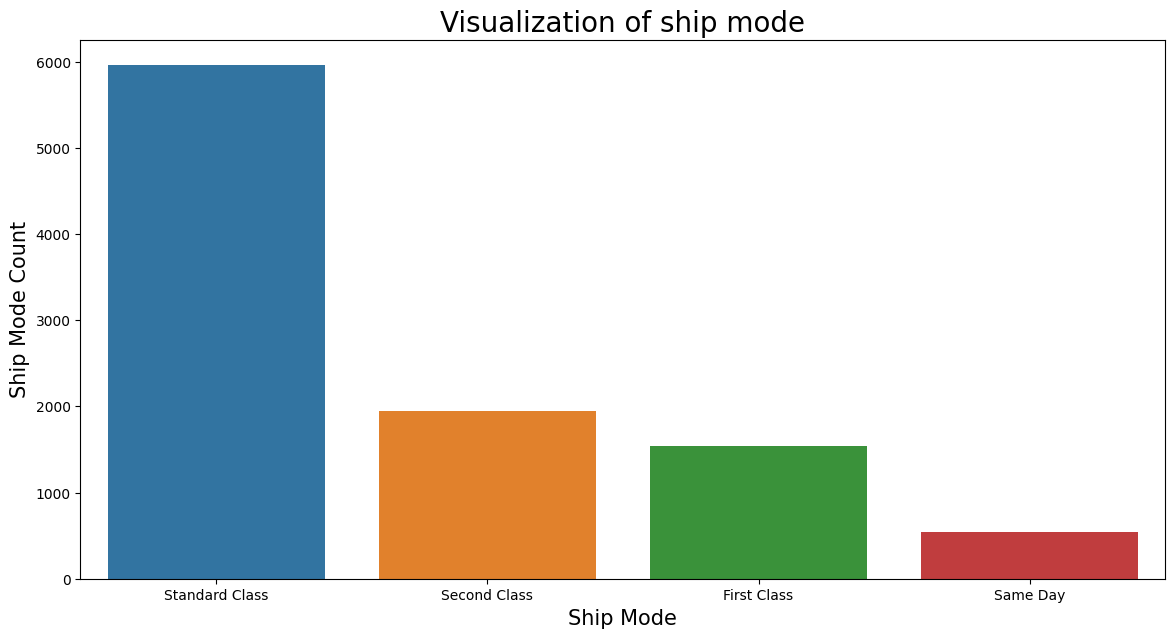

In [25]:
# visualization of ship mode
plt.figure(figsize=(14,7))
sns.barplot(x =ship_mode_counts['Ship Mode'], y=ship_mode_counts['ship_mode_counts'], order=ship_mode_counts['Ship Mode'])
plt.ylabel("Ship Mode Count", fontsize = 15)
plt.xlabel('Ship Mode', fontsize = 15)
plt.title('Visualization of ship mode', fontsize = 20)
plt.show()

*From above barplot, we can see that standard class ship mode is highly preffered and same-day ship mode is less preferred.*

## 2) Most preferred segment type?

In [26]:
preferred_segment_type = df1['Segment'].value_counts()
preferred_segment_type

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

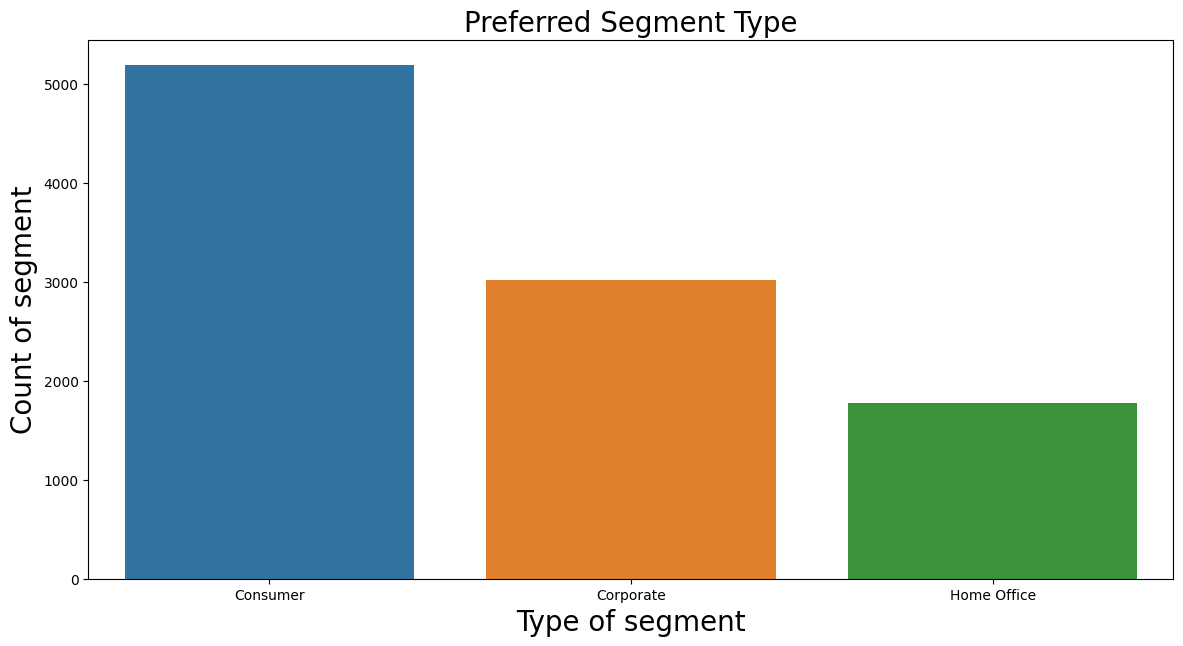

In [27]:
plt.figure(figsize=(14,7))
sns.countplot(x=df1['Segment'],order=preferred_segment_type.index)
plt.title('Preferred Segment Type', fontsize=20)
plt.xlabel('Type of segment', fontsize = 20)
plt.ylabel('Count of segment', fontsize = 20)
plt.show()

From above countplot we can conclude that consumer segment type is highly preferred.

### 3) In which city market is high? First 10 cities.

In [28]:
high_market_city = df1['City'].value_counts()[:10]
high_market_city

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
Houston          375
Chicago          313
Columbus         221
San Diego        170
Springfield      163
Name: City, dtype: int64

Text(0.5, 1.0, 'Market in top 10 cities')

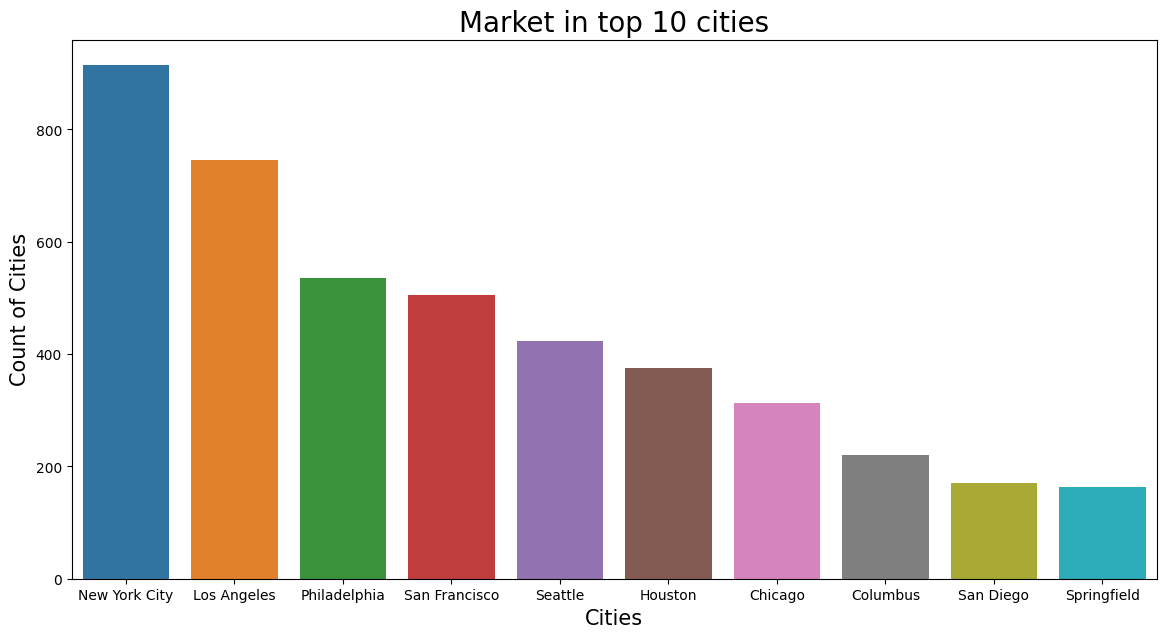

In [29]:
# visualization of top 10 cities
plt.figure(figsize=(14,7))
sns.countplot(x=df1['City'],order=high_market_city.index)
plt.ylabel('Count of Cities', fontsize = 15)
plt.xlabel('Cities', fontsize = 15)
plt.title('Market in top 10 cities', fontsize=20)

From above countplot we can see that in New York City market is high.

### 4) In which region market is high?

In [30]:
high_market_region = df1['Region'].value_counts().reset_index().rename(columns={'index':'Region','Region':'count_of_orders'})
high_market_region

,Region,count_of_orders
0,West,3193
1,East,2845
2,Central,2319
3,South,1620


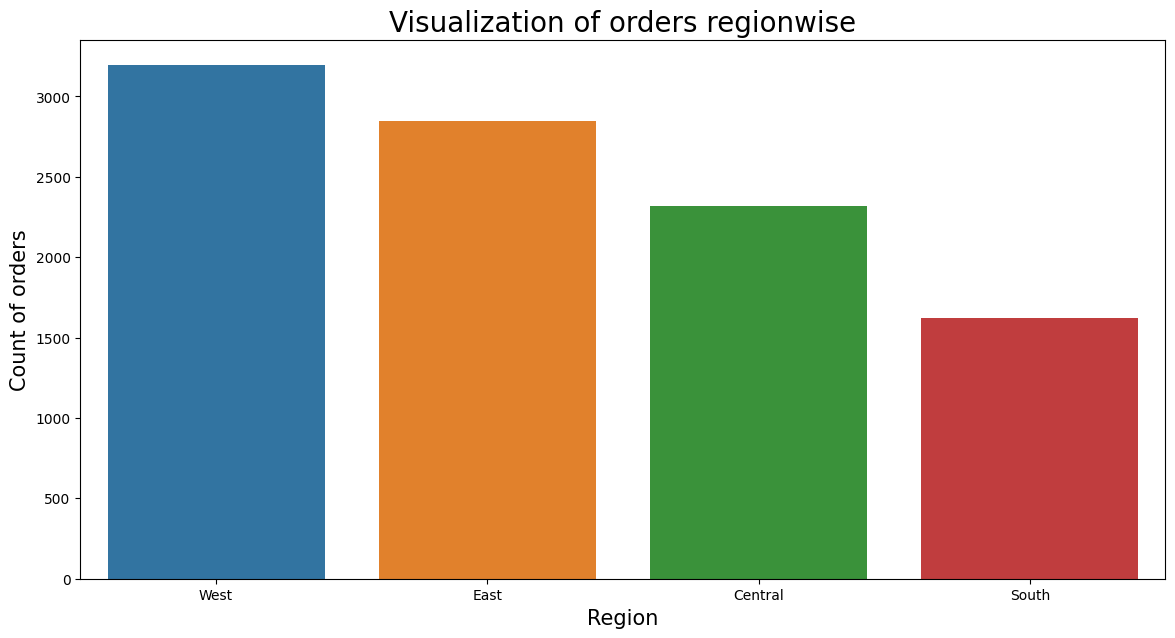

In [31]:
# visualization of market regionwise
plt.figure(figsize=(14,7))
sns.barplot(x =high_market_region['Region'], y=high_market_region['count_of_orders'], order=high_market_region['Region'])
plt.ylabel("Count of orders", fontsize = 15)
plt.xlabel('Region', fontsize = 15)
plt.title('Visualization of orders regionwise', fontsize = 20)
plt.show()

From the above barplot, we can see that west region has higher count of orders and South region has lower count of orders. We have to focus on south region.

### 5) Which category of product is highly sold?

In [32]:
highest_sale = df1.groupby('Category')['Sales'].mean().reset_index()
highest_sale

,Category,Sales
0,Furniture,350.002981
1,Office Supplies,119.550107
2,Technology,452.709276


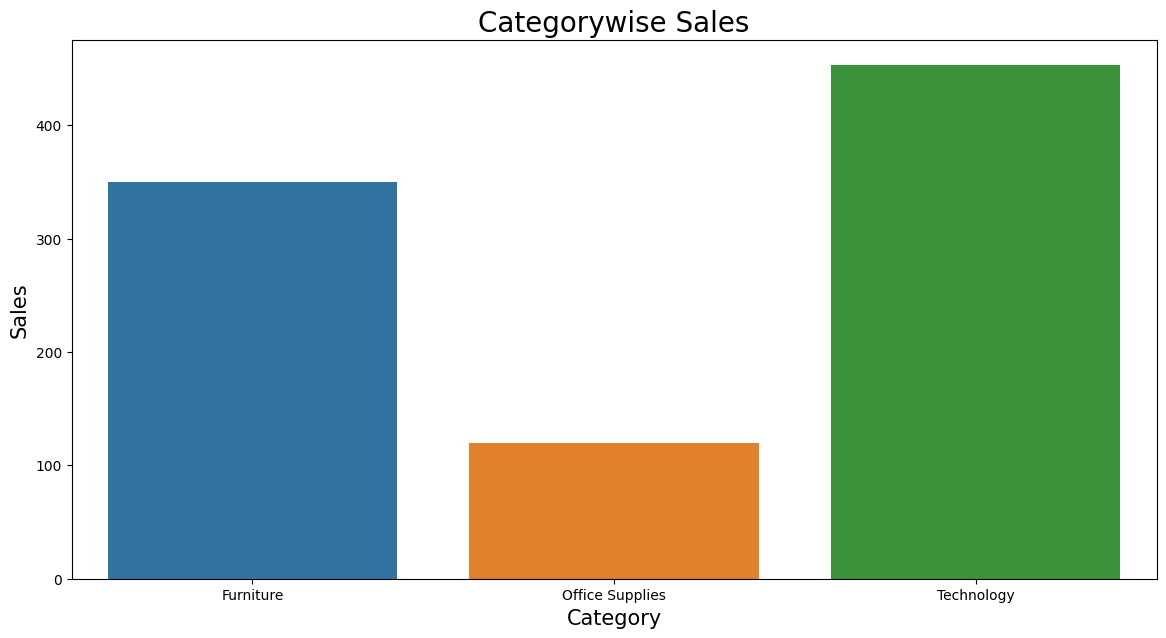

In [33]:
# Visualization of categorywise sales
plt.figure(figsize=(14,7))
sns.barplot(x =highest_sale['Category'], y=highest_sale['Sales'])
plt.ylabel("Sales", fontsize = 15)
plt.xlabel('Category', fontsize = 15)
plt.title('Categorywise Sales', fontsize = 20)
plt.show()

From above plot We can see that the technology category has the highest sales and office supplies has fewer sales. So we have to focuse on office supplies to increase sale.

In [34]:
highest_profit = df1.groupby('Category')['Profit'].mean().reset_index()
highest_profit

,Category,Profit
0,Furniture,8.697740
1,Office Supplies,20.353403
2,Technology,78.752002


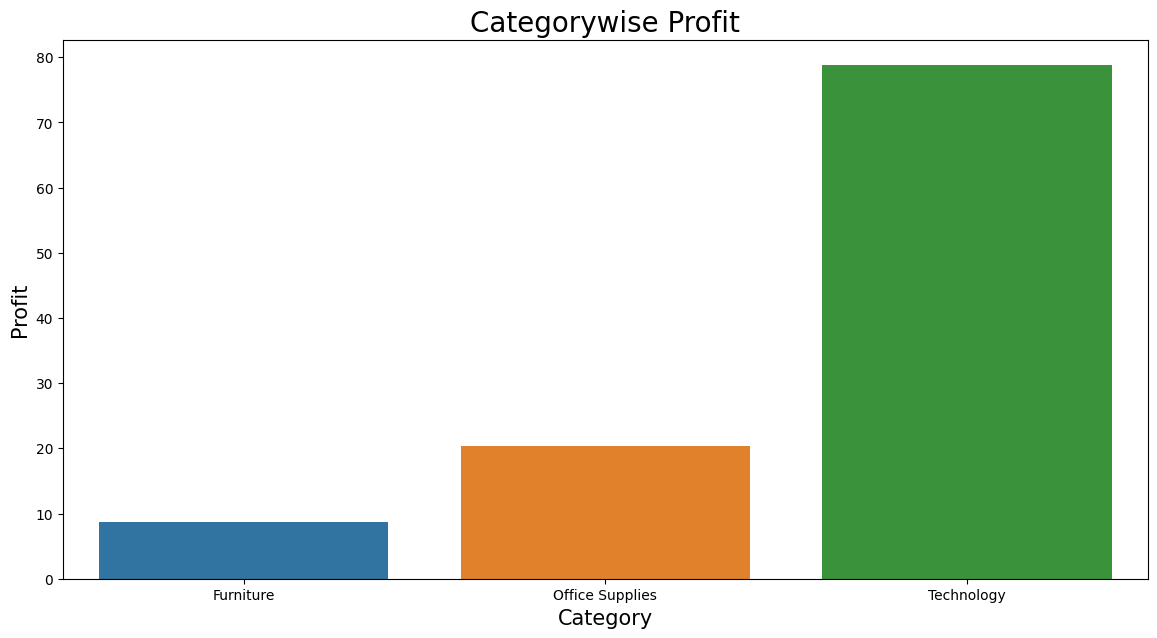

In [35]:
plt.figure(figsize=(14,7))
sns.barplot(x =highest_profit['Category'], y=highest_profit['Profit'])
plt.ylabel("Profit", fontsize = 15)
plt.xlabel('Category', fontsize = 15)
plt.title('Categorywise Profit', fontsize = 20)
plt.show()

The technology category has highest profit and the furniture and office supplies category has less profit. So it is necessary to focus on these categories also to improve profit.

In [36]:
subcategories = df1.groupby('Sub-Category').sum().reset_index().sort_values('Profit',ascending=True)
subcategories

<ipython-input-36-4a7b6503afa6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subcategories = df1.groupby('Sub-Category').sum().reset_index().sort_values('Profit',ascending=True)


,Sub-Category,Postal Code,Sales,Quantity,Discount,Profit
16,Tables,18607828,206965.5320,1241,83.35,-17725.4811
4,Bookcases,12771539,114879.9963,868,48.14,-3472.5560
15,Supplies,10633558,46673.5380,647,14.60,-1189.0995
8,Fasteners,12506063,3024.2800,914,17.80,949.5182
11,Machines,6364668,189238.6310,440,35.20,3384.7569
10,Labels,19458863,12444.9120,1396,25.00,5526.3820
2,Art,43235536,27107.0320,2996,59.60,6524.6118
7,Envelopes,13325731,16476.4020,906,20.40,6964.1767
9,Furnishings,51782325,91683.0240,3560,132.40,13052.7230
1,Appliances,25250538,107532.1610,1729,77.60,18138.0054


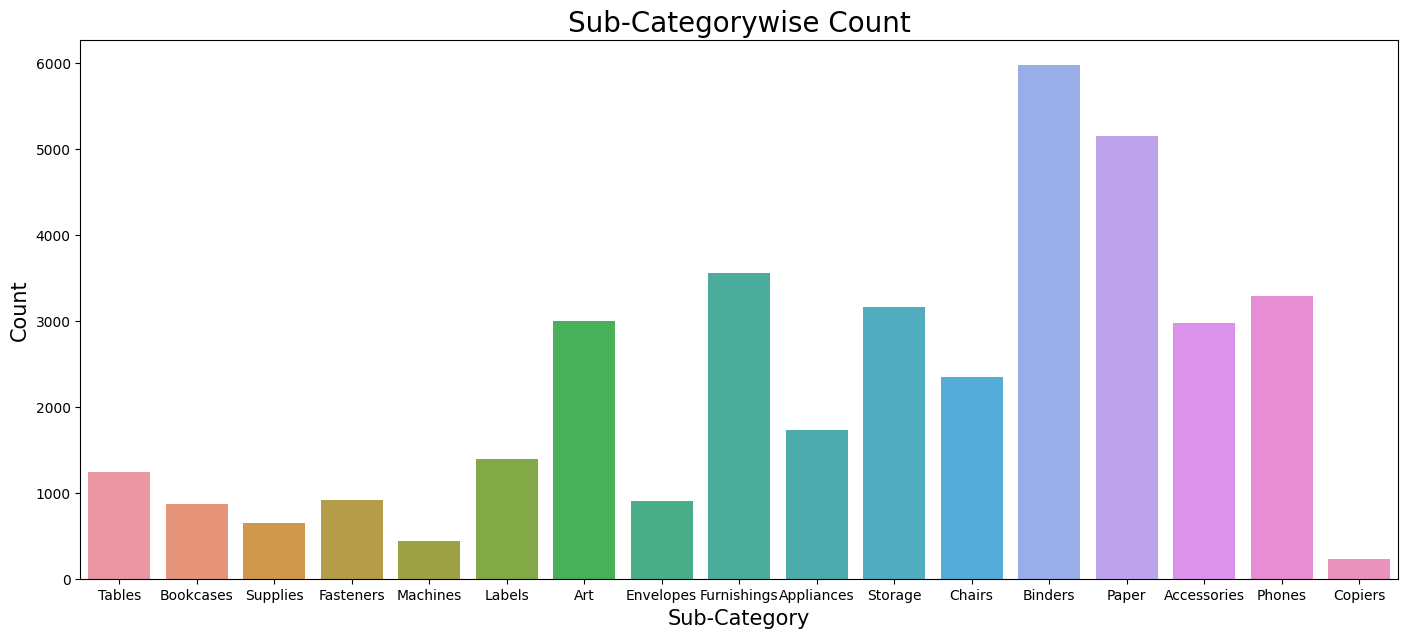

In [37]:
plt.figure(figsize=(17,7))
sns.barplot(x =subcategories['Sub-Category'], y=subcategories['Quantity'], data=subcategories['Sub-Category'])
plt.ylabel("Count", fontsize = 15)
plt.xlabel('Sub-Category', fontsize = 15)
plt.title('Sub-Categorywise Count', fontsize = 20)
plt.show()

Copiers and Machines subcategory needs improvement.

### **Dataset which have only data of loss**

In [38]:
# Create a loss dataframe
loss_df = df1[df1['Profit'] < 0]
loss_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [39]:
# Shape of loss_df
loss_df.shape

(1869, 13)

In [40]:
# Information of loss_df
loss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 3 to 9962
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     1869 non-null   object 
 1   Segment       1869 non-null   object 
 2   Country       1869 non-null   object 
 3   City          1869 non-null   object 
 4   State         1869 non-null   object 
 5   Postal Code   1869 non-null   int64  
 6   Region        1869 non-null   object 
 7   Category      1869 non-null   object 
 8   Sub-Category  1869 non-null   object 
 9   Sales         1869 non-null   float64
 10  Quantity      1869 non-null   int64  
 11  Discount      1869 non-null   float64
 12  Profit        1869 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 204.4+ KB


In [41]:
#Description of loss_df
loss_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,55995.456929,250.627190,3.764045,0.480813,-83.527549
std,26053.542252,715.426811,2.142032,0.235053,284.565230
min,1841.000000,0.444000,1.000000,0.100000,-6599.978000
25%,33024.000000,12.544000,2.000000,0.200000,-58.687200
50%,60623.000000,71.088000,3.000000,0.400000,-18.106800
75%,77095.000000,285.480000,5.000000,0.700000,-6.286000
max,98198.000000,22638.480000,14.000000,0.800000,-0.089500


### ***First calculate total loss***

In [42]:
# Total loss is calculated
total_loss = np.negative(loss_df['Profit'].sum())
print('Total_loss = %.2f' %total_loss)

Total_loss = 156112.99


### 1) In which segement loss is higher?

In [43]:
# Loss by segment
loss_in_segment = df1.groupby('Segment').sum().reset_index()
loss_in_segment

<ipython-input-43-de306d8414f3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loss_in_segment = df1.groupby('Segment').sum().reset_index()


,Segment,Postal Code,Sales,Quantity,Discount,Profit
0,Consumer,288269634,1.160833e+06,19497,820.51,134007.4413
1,Corporate,164108306,7.060701e+05,11591,476.85,91954.9798
2,Home Office,97903137,4.292927e+05,6732,261.83,60279.0015


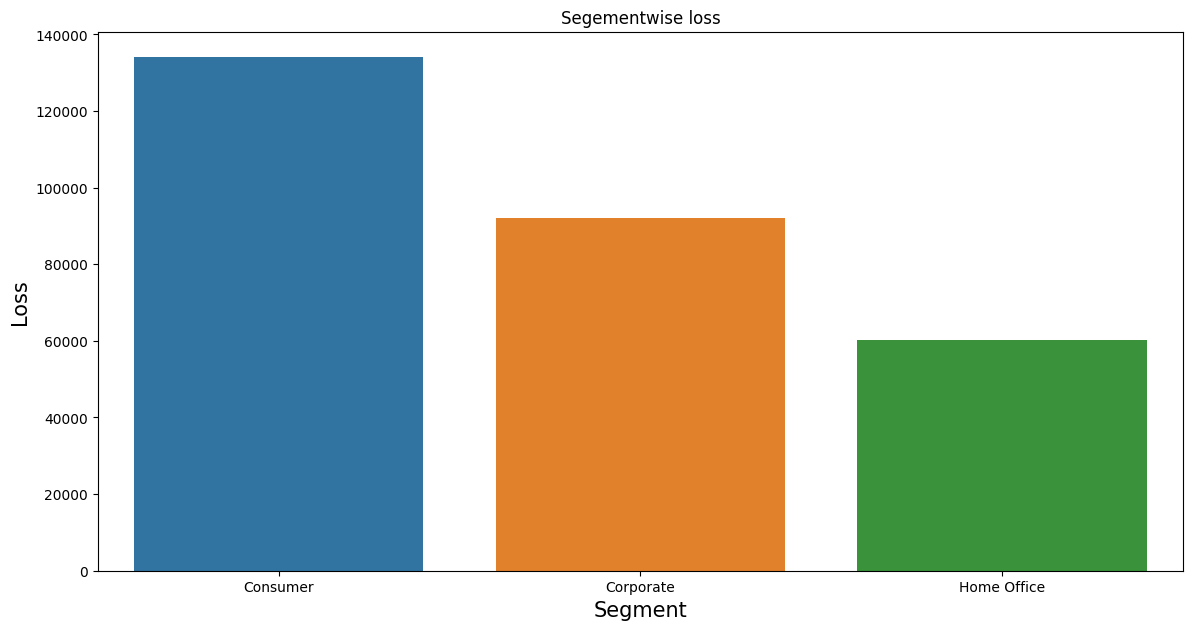

In [44]:
# Barplot for loss by segment
plt.figure(figsize=(14,7))
sns.barplot(x=loss_in_segment['Segment'], y=loss_in_segment['Profit'], data=loss_in_segment['Segment'])
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Segment', fontsize=15)
plt.title('Segementwise loss')
plt.show()

From the above plot, we can see that the home office and corporate both have less profit. There is only one segment of consumers that gives high profit. So if we increase sales in this segment by advertisement or any other way we can gain more profit and with that we have to focus on another segment also to increase the profit.

### 2) In which state loss is maximum?

In [45]:
# Loss according to state
loss_in_state = loss_df.groupby('State').sum().reset_index().sort_values('Profit',ascending=True).head(10)
loss_in_state

<ipython-input-45-cc2992a7b107>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loss_in_state = loss_df.groupby('State').sum().reset_index().sort_values('Profit',ascending=True).head(10)


,State,Postal Code,Sales,Quantity,Discount,Profit
20,Texas,37388572,102656.4568,1855,263.24,-36813.1875
15,Ohio,9144155,49526.2520,776,98.40,-21737.9414
17,Pennsylvania,5291815,75792.2320,993,128.10,-21602.8515
6,Illinois,15419174,38622.6380,945,143.10,-19495.4605
14,North Carolina,1909180,28226.5400,300,34.40,-11557.9854
2,Colorado,5300931,12833.2140,269,34.40,-8900.9048
5,Florida,4155698,45694.1320,478,63.25,-8689.8295
19,Tennessee,2446904,17714.5130,226,29.70,-7257.0174
0,Arizona,7247267,14179.0490,354,40.20,-6656.7675
13,New York,489656,26533.3500,160,14.60,-5031.1378


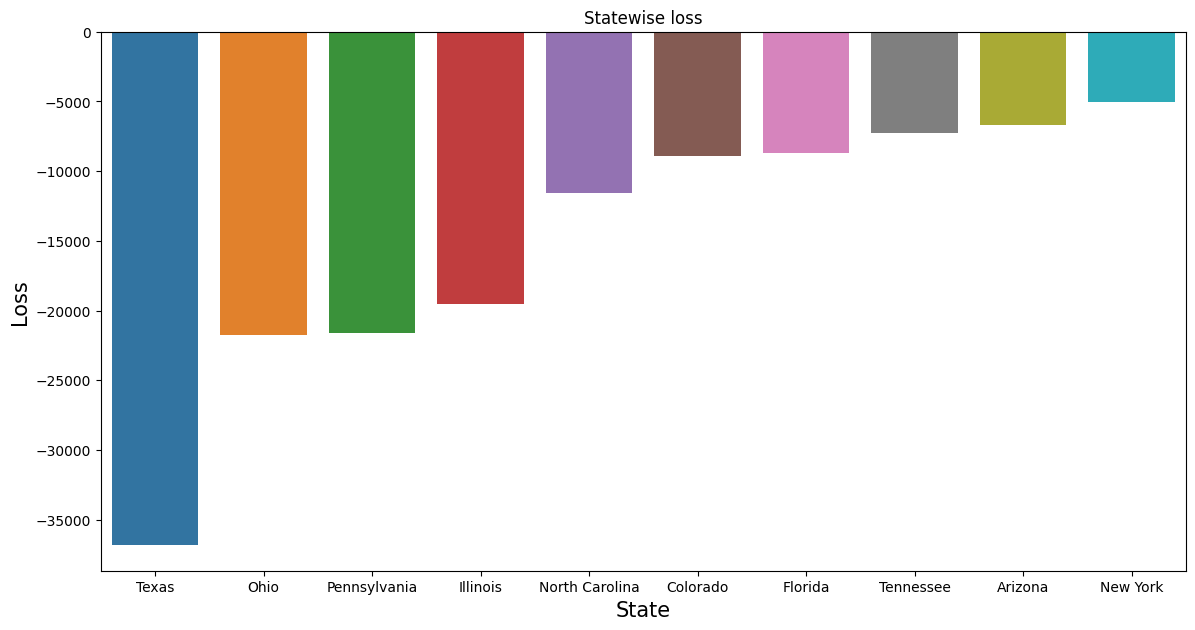

In [46]:
# Barplot of loss by state
plt.figure(figsize=(14,7))
sns.barplot(x=loss_in_state['State'], y=loss_in_state['Profit'], data=loss_in_state['State'])
plt.ylabel('Loss', fontsize=15)
plt.xlabel('State', fontsize=15)
plt.title('Statewise loss')
plt.show()

* **Above list shows that the names of the top 10 states where loss is high.**
* **In texas loss is more.**

### 3) Maximum loss in category.

In [47]:
# Loss by category
loss_in_category = loss_df.groupby('Category').mean().reset_index().sort_values('Profit',ascending=True).head(10)
loss_in_category

<ipython-input-47-c1ecd6f22985>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loss_in_category = loss_df.groupby('Category').mean().reset_index().sort_values('Profit',ascending=True).head(10)


,Category,Postal Code,Sales,Quantity,Discount,Profit
2,Technology,50287.590406,439.899974,3.553506,0.333579,-142.361322
0,Furniture,59724.009818,361.296234,3.716690,0.367237,-85.447476
1,Office Supplies,54739.381921,103.508600,3.866667,0.617401,-63.964996


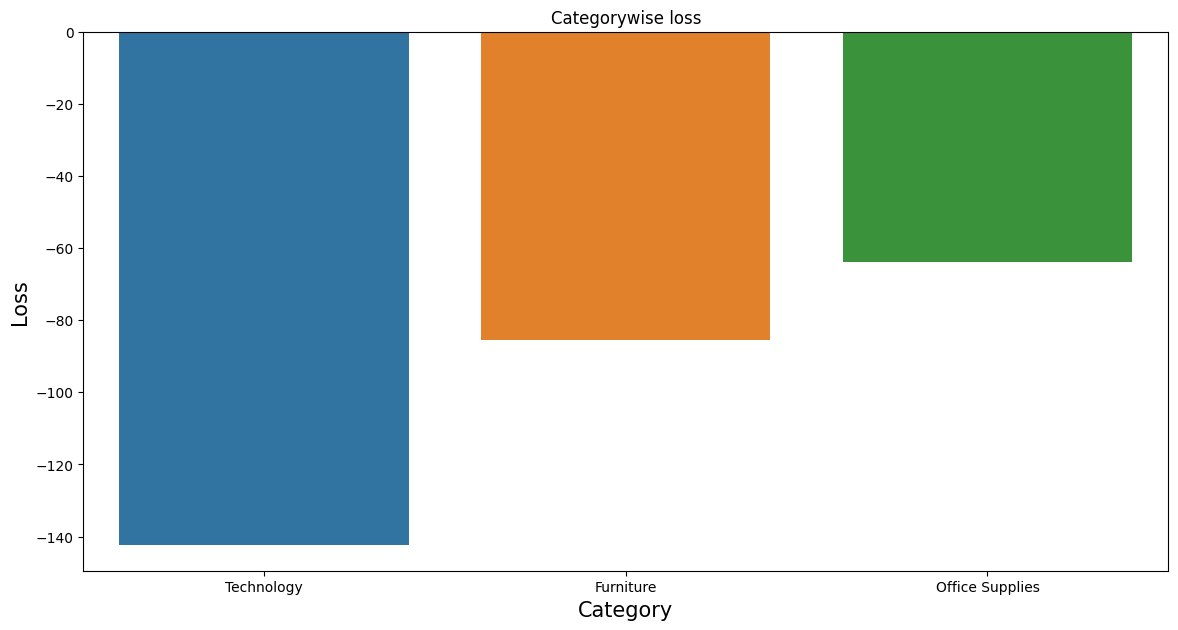

In [48]:
#Visualization of loss by category
plt.figure(figsize=(14,7))
sns.barplot(x=loss_in_category['Category'], y=loss_in_category['Profit'], data=loss_in_category['Category'])
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Category', fontsize=15)
plt.title('Categorywise loss')
plt.show()

### 4) Maximum loss in sub category

In [49]:
# Loss by subcateory
loss_in_subcategory = loss_df.groupby(by='Sub-Category').sum().reset_index()
loss_in_subcategory

<ipython-input-49-e1bf6be6a52a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loss_in_subcategory = loss_df.groupby(by='Sub-Category').sum().reset_index()


,Sub-Category,Postal Code,Sales,Quantity,Discount,Profit
0,Accessories,5286382,10958.8000,330,18.20,-930.6265
1,Appliances,4825871,3382.5340,235,53.60,-8629.6412
2,Binders,32548647,36137.0490,2453,451.60,-38504.2594
3,Bookcases,6423506,48072.7408,422,37.99,-12152.2060
4,Chairs,14964796,91707.0840,874,61.10,-9868.7825
5,Fasteners,701930,149.2800,55,2.40,-33.1952
6,Furnishings,10970913,12845.8440,597,88.60,-6490.9134
7,Machines,2236261,72456.2530,157,25.60,-30118.6682
8,Phones,6105294,35797.8400,476,46.60,-7530.6235
9,Storage,8606475,37869.0720,569,32.20,-6426.3038


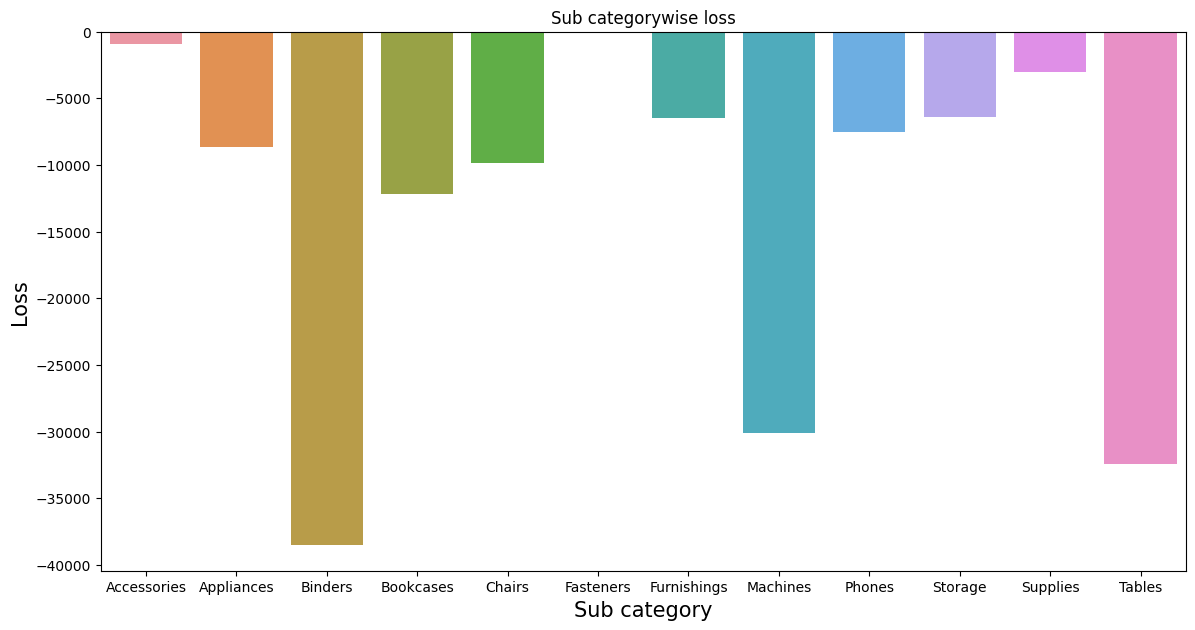

In [50]:
# Barplot for loss by subcategory
plt.figure(figsize=(14,7))
sns.barplot(x=loss_in_subcategory['Sub-Category'], y=loss_in_subcategory['Profit'], data=loss_in_subcategory['Sub-Category'])
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Sub category', fontsize=15)
plt.title('Sub categorywise loss')
plt.show()

From the above graph, we can see that three subcategories that is blinders, machines, and tables have more loss. To avoid this loss we can start giving less discount on those categories but binders have maximum sale means giving less discount may lead to more loss. So better to give discounts on those categories which are getting less sold so that those categories will start getting more sales.

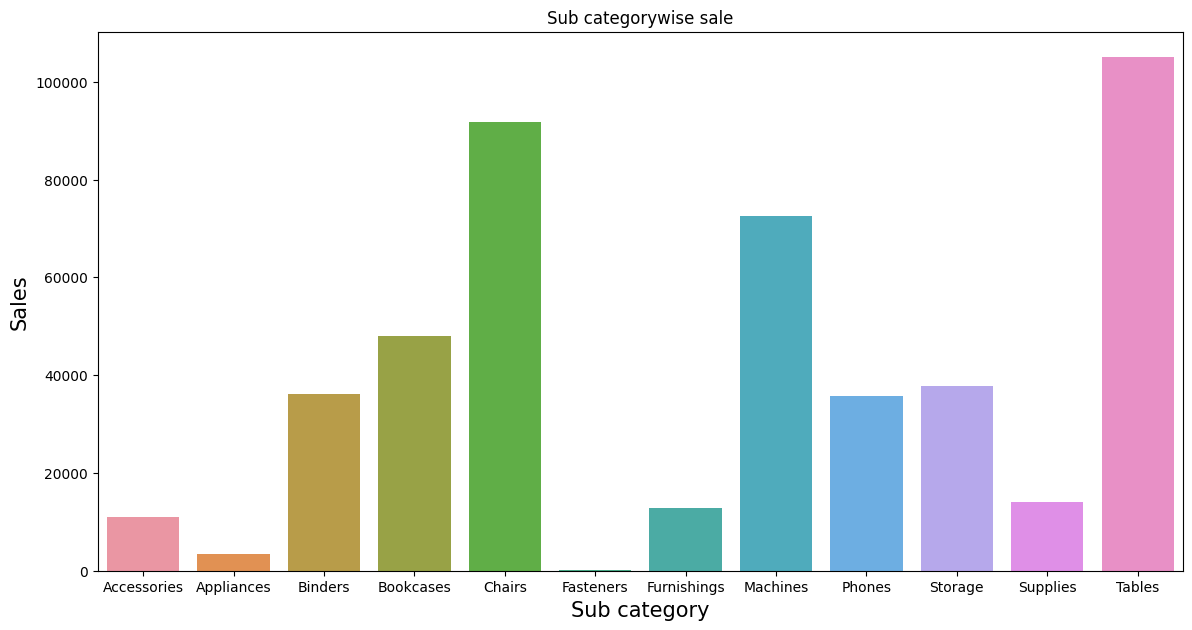

In [51]:
# Visualization of sales by subcategory
plt.figure(figsize=(14,7))
sns.barplot(x=loss_in_subcategory['Sub-Category'], y=loss_in_subcategory['Sales'], data=loss_in_subcategory['Sub-Category'])
plt.ylabel('Sales', fontsize=15)
plt.xlabel('Sub category', fontsize=15)
plt.title('Sub categorywise sale')
plt.show()

From this graph we can see that sales for Fasteners, Appliances, Furnishings, and Accesories are very low.

In [52]:
loss_df['Sub-Category'].value_counts()

Binders        612
Chairs         234
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: Sub-Category, dtype: int64

### 5) Top 10 cities where loss is high?

In [53]:
# Loss according to city
high_loss_cities = loss_df.groupby('City')['Profit'].sum().reset_index().sort_values('Profit',ascending=True).head(10)
high_loss_cities

,City,Profit
168,Philadelphia,-19590.7411
103,Houston,-14785.3668
39,Chicago,-11114.3901
193,San Antonio,-7831.0254
114,Lancaster,-7632.4946
30,Burlington,-5999.3318
56,Dallas,-4208.5218
107,Jacksonville,-4059.9857
145,New York City,-3966.0226
123,Louisville,-3694.1045


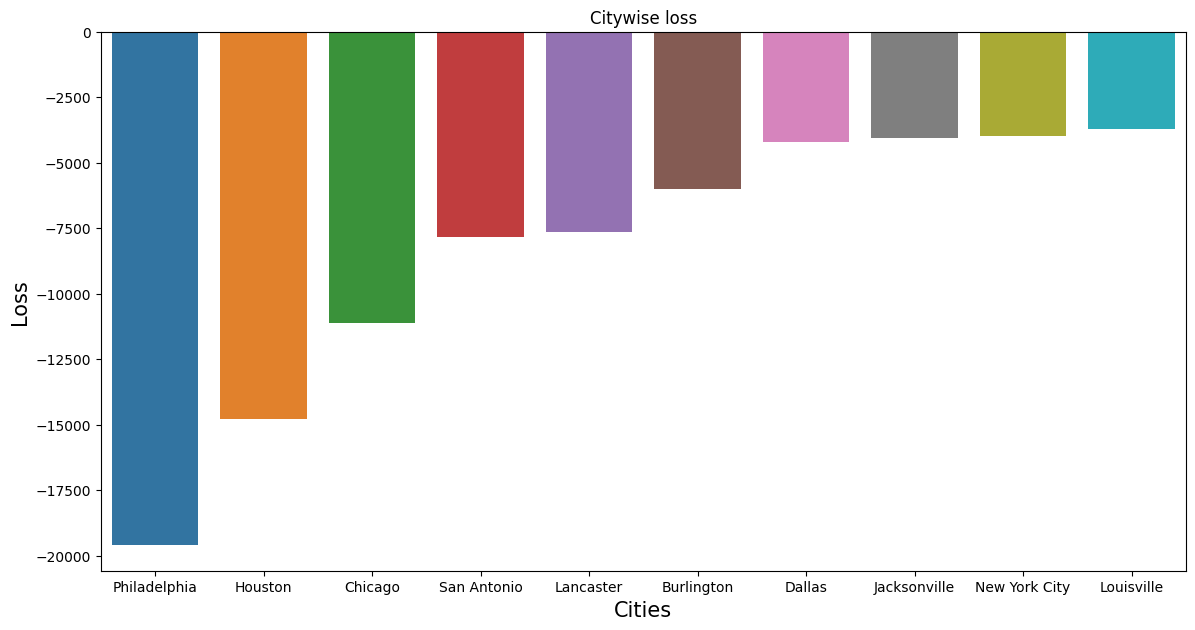

In [54]:
# Visualization of loss by city
plt.figure(figsize=(14,7))
sns.barplot(x=high_loss_cities['City'], y=high_loss_cities['Profit'], data=high_loss_cities['City'])
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Cities', fontsize=15)
plt.title('Citywise loss')
plt.show()

The above plot is for top 10 cities in which loss is high. So we can focuse on these cities.

### 6) Region wise profit.

In [55]:
# Profit by region
region_profit = df1.groupby(by='Region').sum().reset_index().sort_values('Profit',ascending=True)
region_profit

<ipython-input-55-f1123ee73924>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_profit = df1.groupby(by='Region').sum().reset_index().sort_values('Profit',ascending=True)


,Region,Postal Code,Sales,Quantity,Discount,Profit
0,Central,151523188,500782.8528,8768,557.14,39655.8752
2,South,55875052,391721.9050,6209,238.55,46749.4303
1,East,50099338,678435.1960,10609,413.50,91506.3092
3,West,292783499,725255.6365,12234,350.00,108329.8079


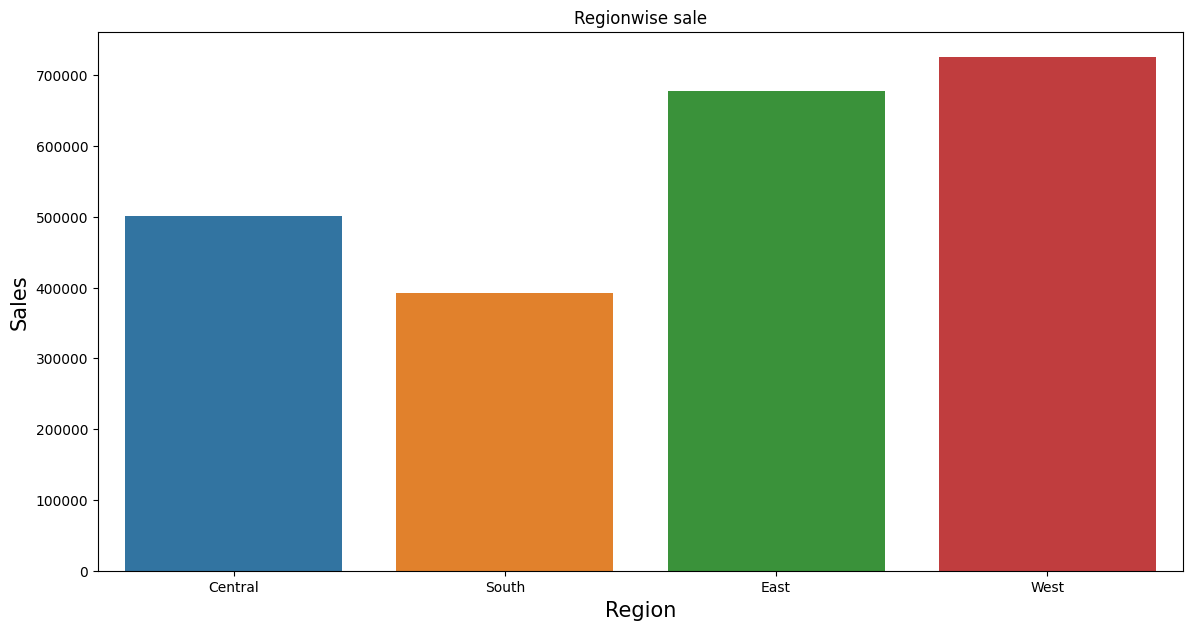

In [56]:
# Visualization of profit by region
plt.figure(figsize=(14,7))
sns.barplot(x=region_profit['Region'], y=region_profit['Sales'], data=region_profit['Region'])
plt.ylabel('Sales', fontsize=15)
plt.xlabel('Region', fontsize=15)
plt.title('Regionwise sale')
plt.show()

We can see that the south region has less sale. So we should focus on this area to increase profit.

<ipython-input-57-c7f85c906155>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


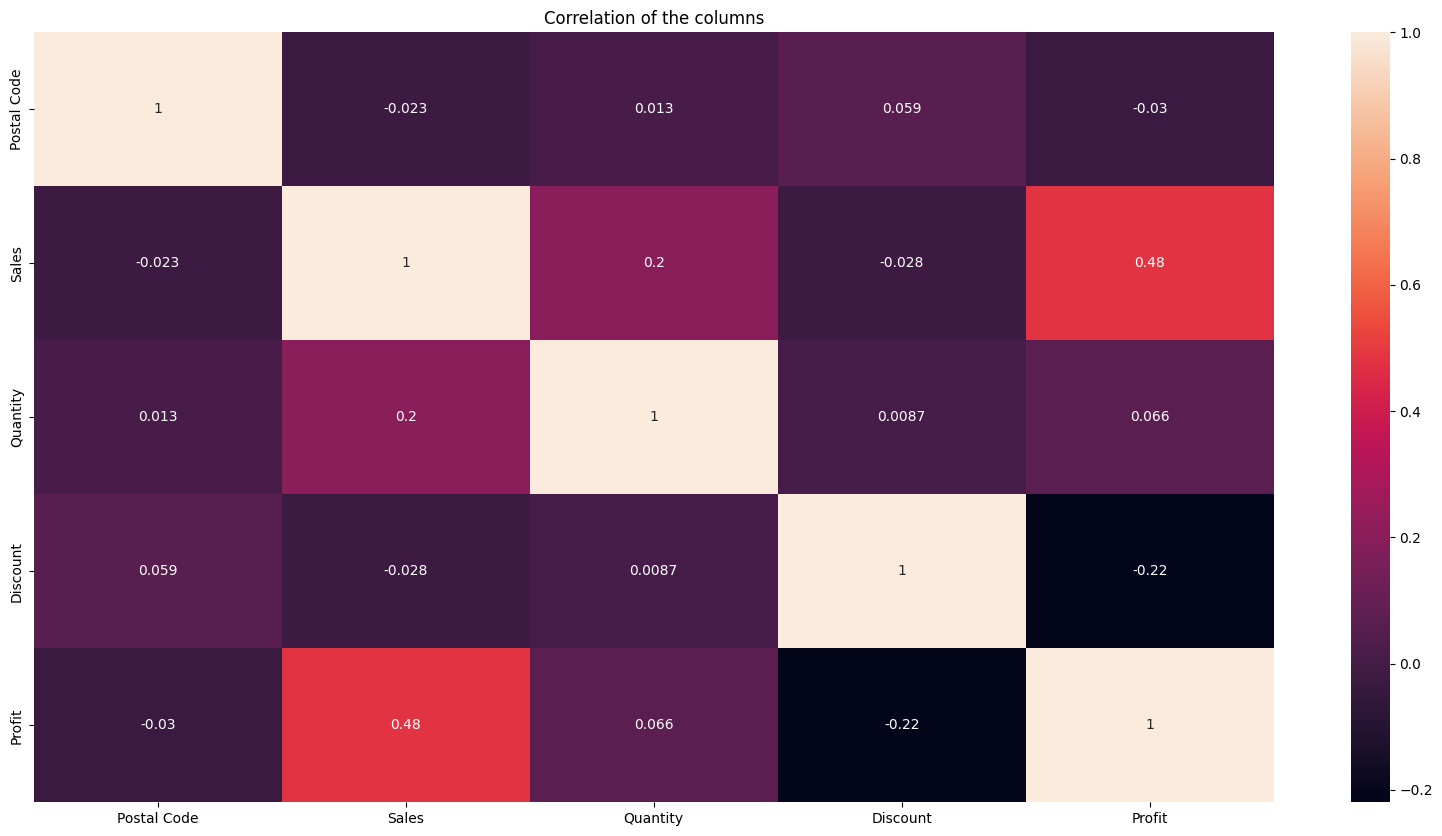

In [57]:
# Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)
plt.title('Correlation of the columns')
plt.show()

From heatmap we can see that Sales and Discount are positively correlated and discount profit are negatively correlated.

### **Suggestions to increase more profit**

* **To increase profit some factors are important like maximum sales, satisfing shipment, discount, quantity of orders etc.**
* **From above analysis it is clear that there is only one shipment mode which has more count. So client must have focus on tha other mode to increase count.**
* **Client must have focus on the corporate and home office segment.**
* **Only technology category has highest sale. So client must focus on furniture and office supplies category.**
* **South region has less sales. So client must have increase sale in south region.**
* **Superstor facing maximum loss in Philadephia. So client must have to focus in that city to increase profit.**
* **Sales for Fasteners, Appliances, Furnishings and Accessories subcategories are very low. So client should have focus on these ares and have to increase sales by giving discount or by other ways.**

### **Overall Analysis**

* Ship mode count of the standard class is high and count of same day is very low.
* Superstore has a high market in New York City and after that in Los Angeles city.
* Western region has a high market and sounthern region has a low market.
* Technology category has high sales but office supplies has less sales.
* Furniture category has low profit.
* Copiers and Machines subcategory has low market.
* Super store faces very high loss in Texas state.
* Blinders, Machines and Tables have more loss.
Sales and discount are positively correlated and discount and profit are negatively correlated.